### Libraries:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from keras.models import Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation, Reshape, UpSampling2D
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
from keras import models, layers
from keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score
import keras

### Warnings:

In [ ]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning, message="The objective has been evaluated at this point before.")

### Read dataset:

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data2_filled.csv to data2_filled.csv


In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['data2_filled.csv']))
df

,Study_Folder,Subject_Folder,Stimuli,Frame Number,Face_Y,Face_X,Face_W,Face_H,Right_Eye_X,Right_Eye_Y,Left_Eye_X,Left_Eye_Y,Face_Angle,X_Predictions,Y_Predictions
0,1a701efe-2b88-4be4-ae73-6307162d5873,videos,0,0,214.0,145.0,226.0,226.0,224.0,367.0,229.0,288.0,0.440271,0.124451,0.166400
1,1a701efe-2b88-4be4-ae73-6307162d5873,videos,0,1,208.0,137.0,234.0,234.0,226.0,370.0,230.0,288.0,0.351382,0.124451,0.166400
2,1a701efe-2b88-4be4-ae73-6307162d5873,videos,0,2,211.0,138.0,230.0,230.0,222.0,370.0,227.0,290.0,0.397633,0.124451,0.166400
3,1a701efe-2b88-4be4-ae73-6307162d5873,videos,0,3,212.0,136.0,230.0,230.0,225.0,367.0,227.0,288.0,0.493340,0.124451,0.166400
4,1a701efe-2b88-4be4-ae73-6307162d5873,videos,0,4,213.0,141.0,229.0,229.0,223.0,371.0,232.0,288.0,0.450772,0.124451,0.166400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60420,74e3ed3f-a2f2-4048-ad5e-7dbe390c0fd0,videos,7998,139,308.0,106.0,227.0,227.0,194.0,456.0,197.0,378.0,2.428763,0.125000,0.166667
60421,74e3ed3f-a2f2-4048-ad5e-7dbe390c0fd0,videos,7998,140,307.0,105.0,229.0,229.0,198.0,456.0,201.0,379.0,2.077050,0.125000,0.166667
60422,74e3ed3f-a2f2-4048-ad5e-7dbe390c0fd0,videos,7998,141,309.0,107.0,225.0,225.0,194.0,456.0,199.0,386.0,1.936886,0.125000,0.165266
60423,74e3ed3f-a2f2-4048-ad5e-7dbe390c0fd0,videos,7998,142,310.0,107.0,224.0,224.0,197.0,463.0,199.0,381.0,2.330049,0.124349,0.165266


In [ ]:
# df = pd.read_csv('data2_filled.csv')
# df

,Study_Folder,Subject_Folder,Stimuli,Frame Number,Face_Y,Face_X,Face_W,Face_H,Right_Eye_X,Right_Eye_Y,Left_Eye_X,Left_Eye_Y,Face_Angle,X_Predictions,Y_Predictions
0,1a701efe-2b88-4be4-ae73-6307162d5873,videos,0,0,214.0,145.0,226.0,226.0,224.0,367.0,229.0,288.0,0.440271,0.124451,0.166400
1,1a701efe-2b88-4be4-ae73-6307162d5873,videos,0,1,208.0,137.0,234.0,234.0,226.0,370.0,230.0,288.0,0.351382,0.124451,0.166400
2,1a701efe-2b88-4be4-ae73-6307162d5873,videos,0,2,211.0,138.0,230.0,230.0,222.0,370.0,227.0,290.0,0.397633,0.124451,0.166400
3,1a701efe-2b88-4be4-ae73-6307162d5873,videos,0,3,212.0,136.0,230.0,230.0,225.0,367.0,227.0,288.0,0.493340,0.124451,0.166400
4,1a701efe-2b88-4be4-ae73-6307162d5873,videos,0,4,213.0,141.0,229.0,229.0,223.0,371.0,232.0,288.0,0.450772,0.124451,0.166400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60420,74e3ed3f-a2f2-4048-ad5e-7dbe390c0fd0,videos,7998,139,308.0,106.0,227.0,227.0,194.0,456.0,197.0,378.0,2.428763,0.125000,0.166667
60421,74e3ed3f-a2f2-4048-ad5e-7dbe390c0fd0,videos,7998,140,307.0,105.0,229.0,229.0,198.0,456.0,201.0,379.0,2.077050,0.125000,0.166667
60422,74e3ed3f-a2f2-4048-ad5e-7dbe390c0fd0,videos,7998,141,309.0,107.0,225.0,225.0,194.0,456.0,199.0,386.0,1.936886,0.125000,0.165266
60423,74e3ed3f-a2f2-4048-ad5e-7dbe390c0fd0,videos,7998,142,310.0,107.0,224.0,224.0,197.0,463.0,199.0,381.0,2.330049,0.124349,0.165266


### Drop columns:

In [ ]:
df.drop(['Study_Folder','Subject_Folder'], axis = 1, inplace = True)

In [ ]:
df

,Stimuli,Frame Number,Face_Y,Face_X,Face_W,Face_H,Right_Eye_X,Right_Eye_Y,Left_Eye_X,Left_Eye_Y,Face_Angle,X_Predictions,Y_Predictions
0,0,0,214.0,145.0,226.0,226.0,224.0,367.0,229.0,288.0,0.440271,0.124451,0.166400
1,0,1,208.0,137.0,234.0,234.0,226.0,370.0,230.0,288.0,0.351382,0.124451,0.166400
2,0,2,211.0,138.0,230.0,230.0,222.0,370.0,227.0,290.0,0.397633,0.124451,0.166400
3,0,3,212.0,136.0,230.0,230.0,225.0,367.0,227.0,288.0,0.493340,0.124451,0.166400
4,0,4,213.0,141.0,229.0,229.0,223.0,371.0,232.0,288.0,0.450772,0.124451,0.166400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60420,7998,139,308.0,106.0,227.0,227.0,194.0,456.0,197.0,378.0,2.428763,0.125000,0.166667
60421,7998,140,307.0,105.0,229.0,229.0,198.0,456.0,201.0,379.0,2.077050,0.125000,0.166667
60422,7998,141,309.0,107.0,225.0,225.0,194.0,456.0,199.0,386.0,1.936886,0.125000,0.165266
60423,7998,142,310.0,107.0,224.0,224.0,197.0,463.0,199.0,381.0,2.330049,0.124349,0.165266


### Define Stimuli, X,Y

In [ ]:
df.columns

Index(['Stimuli', 'Frame Number', 'Face_Y', 'Face_X', 'Face_W', 'Face_H',
       'Right_Eye_X', 'Right_Eye_Y', 'Left_Eye_X', 'Left_Eye_Y', 'Face_Angle',
       'X_Predictions', 'Y_Predictions'],
      dtype='object')

In [ ]:
features_columns = ['Stimuli', 'Frame Number', 'Face_Y', 'Face_X', 'Face_W','Face_H',
                    'Right_Eye_X', 'Right_Eye_Y', 'Left_Eye_X', 'Left_Eye_Y', 'Face_Angle']

target_columns=['X_Predictions', 'Y_Predictions']

In [ ]:
X=df[features_columns]

In [ ]:
y=df[target_columns]

In [ ]:
X_train_valid= X[X['Stimuli']<= 11]

In [ ]:
X_test= X[X['Stimuli']> 11]

In [ ]:
y_train_valid= y[X['Stimuli']<= 11]

In [ ]:
y_test= y[X['Stimuli']> 11]

### Split data:

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.3,stratify =X_train_valid['Stimuli'] ,random_state=42)

In [ ]:
print("Whole dataset :",len(df))
print("X Train size", len(X_train))
print("y Train size", len(y_train))
print("X Valid size", len(X_valid))
print("y Valid size", len(y_valid))
print("X Test size", len(X_test))
print("y Test size", len(y_test))

Whole dataset : 60425
X Train size 23720
y Train size 23720
X Valid size 10167
y Valid size 10167
X Test size 26538
y Test size 26538


In [ ]:
print("X Train shape",X_train.shape)
print("y Train shape",y_train.shape)
print("X Valid shape",X_valid.shape)
print("y Valid shape",y_valid.shape)
print("X Test shape",X_test.shape)
print("y Test shape",y_test.shape)

X Train shape (23720, 11)
y Train shape (23720, 2)
X Valid shape (10167, 11)
y Valid shape (10167, 2)
X Test shape (26538, 11)
y Test shape (26538, 2)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60425 entries, 0 to 60424
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Stimuli        60425 non-null  int64  
 1   Frame Number   60425 non-null  int64  
 2   Face_Y         60425 non-null  float64
 3   Face_X         60425 non-null  float64
 4   Face_W         60425 non-null  float64
 5   Face_H         60425 non-null  float64
 6   Right_Eye_X    60425 non-null  float64
 7   Right_Eye_Y    60425 non-null  float64
 8   Left_Eye_X     60425 non-null  float64
 9   Left_Eye_Y     60425 non-null  float64
 10  Face_Angle     60425 non-null  float64
 11  X_Predictions  60425 non-null  float64
 12  Y_Predictions  60425 non-null  float64
dtypes: float64(11), int64(2)
memory usage: 6.0 MB


In [ ]:
df.isnull().sum()

Stimuli          0
Frame Number     0
Face_Y           0
Face_X           0
Face_W           0
Face_H           0
Right_Eye_X      0
Right_Eye_Y      0
Left_Eye_X       0
Left_Eye_Y       0
Face_Angle       0
X_Predictions    0
Y_Predictions    0
dtype: int64

In [ ]:
X_train['Stimuli'].value_counts().sort_values()/len(X_train), X_valid['Stimuli'].value_counts().sort_values()/len(X_valid)

(0     0.080017
 9     0.083347
 5     0.083474
 2     0.083474
 4     0.083516
 1     0.083600
 10    0.083642
 3     0.083642
 6     0.083685
 7     0.083769
 8     0.083853
 11    0.083980
 Name: Stimuli, dtype: float64,
 0     0.079965
 9     0.083309
 5     0.083505
 2     0.083505
 4     0.083505
 6     0.083604
 10    0.083604
 1     0.083604
 3     0.083702
 7     0.083801
 8     0.083899
 11    0.083997
 Name: Stimuli, dtype: float64)

### Drop columns:

In [ ]:
drop_column = ['Stimuli','Frame Number']

In [ ]:
X.drop(columns = drop_column, inplace=True)

<ipython-input-25-02a2a226598b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns = drop_column, inplace=True)


In [ ]:
X

,Face_Y,Face_X,Face_W,Face_H,Right_Eye_X,Right_Eye_Y,Left_Eye_X,Left_Eye_Y,Face_Angle
0,214.0,145.0,226.0,226.0,224.0,367.0,229.0,288.0,0.440271
1,208.0,137.0,234.0,234.0,226.0,370.0,230.0,288.0,0.351382
2,211.0,138.0,230.0,230.0,222.0,370.0,227.0,290.0,0.397633
3,212.0,136.0,230.0,230.0,225.0,367.0,227.0,288.0,0.493340
4,213.0,141.0,229.0,229.0,223.0,371.0,232.0,288.0,0.450772
...,...,...,...,...,...,...,...,...,...
60420,308.0,106.0,227.0,227.0,194.0,456.0,197.0,378.0,2.428763
60421,307.0,105.0,229.0,229.0,198.0,456.0,201.0,379.0,2.077050
60422,309.0,107.0,225.0,225.0,194.0,456.0,199.0,386.0,1.936886
60423,310.0,107.0,224.0,224.0,197.0,463.0,199.0,381.0,2.330049


In [ ]:
X_train.drop(columns = drop_column, inplace=True)

In [ ]:
X_train

,Face_Y,Face_X,Face_W,Face_H,Right_Eye_X,Right_Eye_Y,Left_Eye_X,Left_Eye_Y,Face_Angle
30626,199.0,183.0,205.0,205.0,266.0,340.0,266.0,259.0,0.353743
10603,225.0,187.0,202.0,202.0,260.0,366.0,259.0,286.0,0.469339
28769,110.0,309.0,199.0,199.0,389.0,242.0,391.0,172.0,0.156968
30149,133.0,242.0,206.0,206.0,331.0,271.0,330.0,202.0,0.206556
16125,239.0,160.0,201.0,201.0,238.0,382.0,231.0,310.0,0.550115
...,...,...,...,...,...,...,...,...,...
28521,153.0,195.0,269.0,269.0,302.0,332.0,306.0,237.0,0.230310
17344,148.0,275.0,209.0,209.0,359.0,295.0,345.0,214.0,0.164995
30525,235.0,160.0,225.0,225.0,255.0,393.0,254.0,311.0,0.642546
26050,254.0,163.0,249.0,249.0,262.0,424.0,268.0,337.0,0.501909


In [ ]:
X_valid.drop(columns = drop_column, inplace=True)

In [ ]:
X_valid

,Face_Y,Face_X,Face_W,Face_H,Right_Eye_X,Right_Eye_Y,Left_Eye_X,Left_Eye_Y,Face_Angle
127,217.0,146.0,231.0,231.0,230.0,380.0,237.0,296.0,0.381793
32452,228.0,255.0,179.0,179.0,328.0,347.0,328.0,288.0,0.379762
19084,223.0,158.0,210.0,210.0,232.0,367.0,229.0,287.0,0.608490
16347,245.0,155.0,221.0,221.0,249.0,397.0,246.0,320.0,0.688683
16544,195.0,176.0,215.0,215.0,262.0,342.0,264.0,260.0,0.333173
...,...,...,...,...,...,...,...,...,...
22209,197.0,180.0,210.0,210.0,264.0,337.0,264.0,257.0,0.321964
16792,272.0,122.0,261.0,261.0,225.0,454.0,222.0,363.0,1.236665
19581,271.0,120.0,262.0,262.0,226.0,442.0,224.0,358.0,1.236923
9269,174.0,65.0,283.0,283.0,191.0,355.0,187.0,246.0,0.364568


In [ ]:
X_test.drop(columns = drop_column, inplace=True)

<ipython-input-31-7ac6106f35b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(columns = drop_column, inplace=True)


In [ ]:
X_test

,Face_Y,Face_X,Face_W,Face_H,Right_Eye_X,Right_Eye_Y,Left_Eye_X,Left_Eye_Y,Face_Angle
33887,211.0,159.0,236.0,236.0,244.0,369.0,249.0,281.0,0.362482
33888,211.0,157.0,238.0,238.0,243.0,367.0,249.0,283.0,0.379243
33889,210.0,159.0,235.0,235.0,244.0,369.0,249.0,280.0,0.351363
33890,210.0,158.0,236.0,236.0,244.0,368.0,248.0,282.0,0.357945
33891,209.0,158.0,238.0,238.0,244.0,368.0,249.0,282.0,0.360192
...,...,...,...,...,...,...,...,...,...
60420,308.0,106.0,227.0,227.0,194.0,456.0,197.0,378.0,2.428763
60421,307.0,105.0,229.0,229.0,198.0,456.0,201.0,379.0,2.077050
60422,309.0,107.0,225.0,225.0,194.0,456.0,199.0,386.0,1.936886
60423,310.0,107.0,224.0,224.0,197.0,463.0,199.0,381.0,2.330049


### MinMaxScaler

In [ ]:
minmax_scaler = preprocessing.MinMaxScaler()
X_train_scal = minmax_scaler.fit_transform(X_train)
X_valid_scal = minmax_scaler.transform(X_valid)
X_test_scal = minmax_scaler.transform(X_test)

In [ ]:
X_train_scal

array([[0.36533958, 0.40566038, 0.23668639, ..., 0.38970588, 0.39111111,
        0.00370046],
       [0.42622951, 0.41509434, 0.21893491, ..., 0.37254902, 0.45111111,
        0.00538576],
       [0.15690867, 0.70283019, 0.20118343, ..., 0.69607843, 0.19777778,
        0.00083163],
       ...,
       [0.44964871, 0.35141509, 0.35502959, ..., 0.36029412, 0.50666667,
        0.00791098],
       [0.4941452 , 0.35849057, 0.49704142, ..., 0.39460784, 0.56444444,
        0.00586059],
       [0.264637  , 0.01415094, 0.6035503 , ..., 0.02205882, 0.34666667,
        0.00992458]])

In [ ]:
X_valid_scal

array([[0.40749415, 0.31839623, 0.39053254, ..., 0.31862745, 0.47333333,
        0.0041094 ],
       [0.43325527, 0.5754717 , 0.08284024, ..., 0.54166667, 0.45555556,
        0.00407979],
       [0.42154567, 0.34669811, 0.26627219, ..., 0.29901961, 0.45333333,
        0.00741446],
       ...,
       [0.53395785, 0.25707547, 0.5739645 , ..., 0.28676471, 0.61111111,
        0.01657654],
       [0.30679157, 0.12735849, 0.69822485, ..., 0.19607843, 0.36222222,
        0.00385827],
       [0.36299766, 0.45518868, 0.10059172, ..., 0.41176471, 0.39777778,
        0.00418931]])

In [ ]:
X_test_scal

array([[0.39344262, 0.3490566 , 0.42011834, ..., 0.34803922, 0.44      ,
        0.00382786],
       [0.39344262, 0.34433962, 0.43195266, ..., 0.34803922, 0.44444444,
        0.00407222],
       [0.3911007 , 0.3490566 , 0.41420118, ..., 0.34803922, 0.43777778,
        0.00366576],
       ...,
       [0.62295082, 0.22641509, 0.35502959, ..., 0.2254902 , 0.67333333,
        0.02678145],
       [0.62529274, 0.22641509, 0.34911243, ..., 0.2254902 , 0.66222222,
        0.03251346],
       [0.6206089 , 0.22641509, 0.35502959, ..., 0.22303922, 0.67111111,
        0.03118879]])

### CNN:

In [ ]:
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(9,)))

model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

model.add(BatchNormalization())

model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(2, activation='softmax'))

model.summary()

early_stopping = EarlyStopping(patience=3)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization (BatchN  (None, 16)               64        
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 flatten (Flatten)           (None, 16)                0         
                                                        

In [ ]:
learning_rate=0.001
beta_1=0.9
epsilon=1e-07

optimizer = keras.optimizers.Adam(learning_rate=learning_rate,beta_1=beta_1,epsilon=epsilon)

# Compile the model
model.compile(optimizer=optimizer, loss='mse', metrics=['mse'])

In [ ]:
checkpoint_path = '/content/drive/My Drive/Colab Notebook'

checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, save_weights_only=True, verbose=1)

In [ ]:
model_history = model.fit(X_train_scal, y_train,epochs=5,batch_size=15,verbose=1,validation_data=(X_valid_scal, y_valid), callbacks=[checkpoint])

Epoch 1/5
1580/1582 [============================>.] - ETA: 0s - loss: 0.0781 - mse: 0.0781
Epoch 1: val_loss improved from inf to 0.07592, saving model to /content/drive/My Drive/Colab Notebook
1582/1582 [==============================] - 5s 2ms/step - loss: 0.0781 - mse: 0.0781 - val_loss: 0.0759 - val_mse: 0.0759
Epoch 2/5
1575/1582 [============================>.] - ETA: 0s - loss: 0.0748 - mse: 0.0748
Epoch 2: val_loss improved from 0.07592 to 0.07398, saving model to /content/drive/My Drive/Colab Notebook
1582/1582 [==============================] - 3s 2ms/step - loss: 0.0749 - mse: 0.0749 - val_loss: 0.0740 - val_mse: 0.0740
Epoch 3/5
1558/1582 [============================>.] - ETA: 0s - loss: 0.0732 - mse: 0.0732
Epoch 3: val_loss did not improve from 0.07398
1582/1582 [==============================] - 5s 3ms/step - loss: 0.0732 - mse: 0.0732 - val_loss: 0.0751 - val_mse: 0.0751
Epoch 4/5
1579/1582 [============================>.] - ETA: 0s - loss: 0.0720 - mse: 0.0720
Epoch 

### Epoch table results - Valid:

In [ ]:
epoch_table_valid = []

for epoch in range(len(model_history.history['mse'])):
    data = {'Epoch': epoch + 1,
            'Train MSE': model_history.history['mse'][epoch],
            'Validation MSE': model_history.history['val_mse'][epoch],
            'Loss': model_history.history['loss'][epoch],
            'Val Loss': model_history.history['val_loss'][epoch]}
    epoch_table_valid.append(data)

epoch_data = sorted(epoch_table_valid, key=lambda x: x['Train MSE'], reverse=True)

table = tabulate(epoch_table_valid, headers="keys", tablefmt='pipe')

print(table)

|   Epoch |   Train MSE |   Validation MSE |      Loss |   Val Loss |
|--------:|------------:|-----------------:|----------:|-----------:|
|       1 |   0.078137  |        0.0759211 | 0.078137  |  0.0759211 |
|       2 |   0.0748632 |        0.07398   | 0.0748632 |  0.07398   |
|       3 |   0.0731879 |        0.0751055 | 0.0731879 |  0.0751055 |
|       4 |   0.0720315 |        0.0766607 | 0.0720315 |  0.0766607 |
|       5 |   0.0714093 |        0.0790255 | 0.0714093 |  0.0790255 |


### Save csv file results epoch:

In [ ]:
epoch_table_valid_df = pd.DataFrame(epoch_table_valid)

epoch_table_valid_df.to_csv('epoch_table_valid2.csv', index=False)

In [ ]:
from google.colab import files

files.download('epoch_table_valid2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Evaluate:

In [ ]:
test_loss, test_mse = model.evaluate(X_test_scal, y_test, verbose=1)

print('Final evaluation of the model:')
print('Test MSE:', test_mse)
print('Test loss:',test_loss)

830/830 [==============================] - 1s 1ms/step - loss: 0.0880 - mse: 0.0880
Final evaluation of the model:
Test MSE: 0.08800380676984787
Test loss: 0.08800380676984787


### Predict:

In [ ]:
predictions = model.predict(X_test_scal)

830/830 [==============================] - 1s 1ms/step


### Plot Train vs Valid:

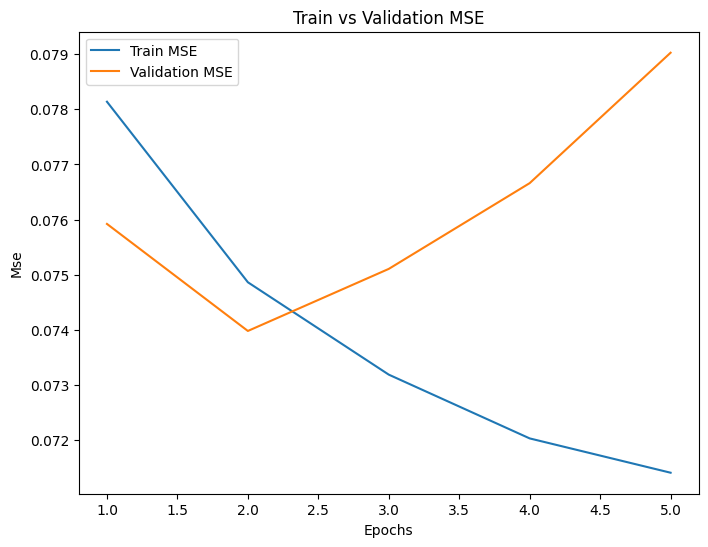

In [ ]:
def plot_accuracy(model_history):
    train_acc = model_history.history['mse']
    val_acc = model_history.history['val_mse']
    epochs = range(1, len(train_acc) + 1)

    plt.figure(figsize=(8, 6))
    plt.plot(epochs, train_acc, label='Train MSE')
    plt.plot(epochs, val_acc, label='Validation MSE')
    plt.title('Train vs Validation MSE')
    plt.xlabel('Epochs')
    plt.ylabel('Mse')
    plt.legend()
    plt.show()

plot_accuracy(model_history)